In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

dataset_path = "/content/drive/My Drive/ANEMIA"
print("Contents of the Dataset Folder:")
print(os.listdir(dataset_path))

Contents of the Dataset Folder:
['Dataset license_ CC BY-NC.docx', 'Dataset description_ India eye images.docx', 'Anemia_dataset_train.xlsx', 'Right_Fingernail_files', 'Left_eye_files', 'Left_Palm_files', 'Tongue_files', 'Right_Palm_files', 'Right_eye_files', 'Left_Fingernail_files', 'labeled_images_anemia_dataset.csv']


In [ ]:
# Path to the Excel file
excel_file_path = os.path.join(dataset_path, 'Anemia_dataset_train.xlsx')

data = pd.read_excel(excel_file_path)
print(data.head())

   Unnamed: 0  index  Total Serial Number  S No.  Unique ID  Blood Sample ID  \
0           0    0.0                    1      1        NaN       2024030518   
1           1    2.0                    3      3        NaN       2024030549   
2           2    3.0                    4      4        NaN       2024030516   
3           3    4.0                    6      6        NaN        202403054   
4           4    5.0                    7      7        NaN       2024030523   

   Haemoglobin (in mg/dl) Age (in years)  Gender  
0                    10.5             75  Female  
1                    13.2             65    Male  
2                    13.1             44  Female  
3                    10.4             70    Male  
4                     9.7             70    Male  


In [ ]:
# Define the specific columns for each sheet that correspond to image paths
image_columns = {
    "Right_Finger_Nail_Data": "Right_finger_nail_Image",
    "Left_Finger_Nail_Data": "Left_Finger_Nail_Images",
    "Left_Palm_Data": "Left_Palm_Images",
    "Right_Palm_Data": "Right_Palm_Images",
    "Right_Eye_Data": "Right_eye_Images",
    "Left_Eye_Data": "Left_Eye_Images",
    "Tongue_Data": "Tongue_Images",
}

# Initialize a list to store labeled dataframes
labeled_dataframes = []

# Iterate over each sheet and process it
for sheet_name, image_col in image_columns.items():
    # Load the sheet
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

    # Check if the required image column and Hb_Value exist in the sheet
    if image_col in df.columns and 'Hb_Value' in df.columns:
        # Classify Hb_Value into anemia categories from NCI
        def classify_anemia(hb_value):
            if hb_value < 6.5:
                return "Life-threatening"
            elif 6.5 <= hb_value < 8.0:
                return "Severe"
            elif 8.0 <= hb_value < 10.0:
                return "Moderate"
            elif 10.0 <= hb_value:
                return "Mild"
            else:
                return "Unknown"

        df['Anemia_Class'] = df['Hb_Value'].apply(classify_anemia)

        df.rename(columns={image_col: 'Image_Path'}, inplace=True)

        df['Source_Sheet'] = sheet_name

        # Append the processed dataframe with the additional columns
        labeled_dataframes.append(
            df[['Image_Path', 'Hb_Value', 'Anemia_Class', 'Gender', 'Age_in_years', 'Blood_Sample_ID', 'Source_Sheet']]
        )
    else:
        print(f"Skipping sheet '{sheet_name}' due to missing required columns.")

# Combine all labeled dataframes
combined_labeled_data = pd.concat(labeled_dataframes, ignore_index=True)

# Save the labeled data to a CSV
output_csv_path = os.path.join(dataset_path, 'labeled_images_anemia_dataset.csv')
combined_labeled_data.to_csv(output_csv_path, index=False)

print(f"Labeled data with metadata saved to: {output_csv_path}")

Labeled data with metadata saved to: /content/drive/My Drive/ANEMIA/labeled_images_anemia_dataset.csv


In [ ]:
print(combined_labeled_data.isnull().sum())  # Check for missing values
print(combined_labeled_data.duplicated().sum())  # Check for duplicates

Image_Path         0
Image_Path         0
Hb_Value           0
Anemia_Class       0
Gender             0
Age_in_years       0
Blood_Sample_ID    0
Source_Sheet       0
dtype: int64
0


Anemia_Class
Mild                1855
Moderate             432
Severe                57
Life-threatening       8
Name: count, dtype: int64


<Axes: xlabel='Hb_Value', ylabel='Count'>

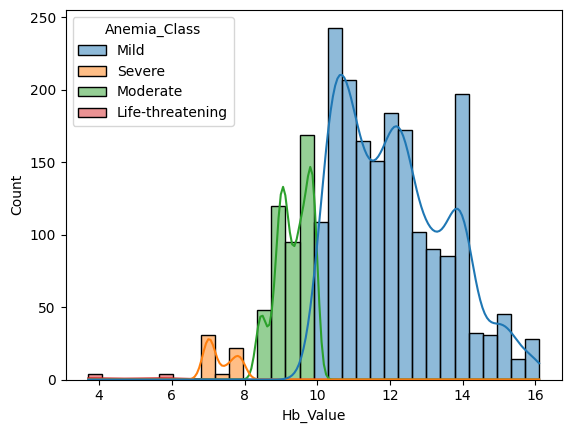

In [ ]:
import seaborn as sns
print(combined_labeled_data['Anemia_Class'].value_counts())
sns.histplot(data=combined_labeled_data, x='Hb_Value', hue='Anemia_Class', kde=True)

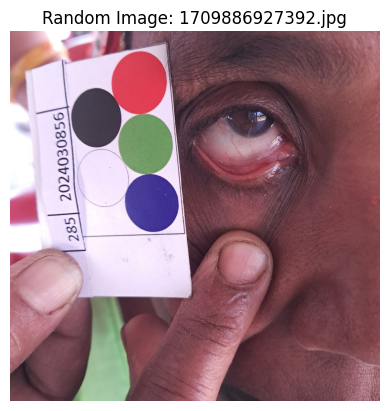

In [ ]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import os
import random

# Path to the directory containing the images
image_dir = os.path.join(dataset_path, 'Right_eye_files')

# List all files in the directory
all_files = os.listdir(image_dir)

image_files = [f for f in all_files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Check if there are images in the folder
if not image_files:
    raise FileNotFoundError(f"No image files found in directory: {image_dir}")

# Randomly select an image
example_image_name = random.choice(image_files)

image_path = os.path.join(image_dir, example_image_name)

# Read the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to read the image: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.title(f"Random Image: {example_image_name}")
plt.show()


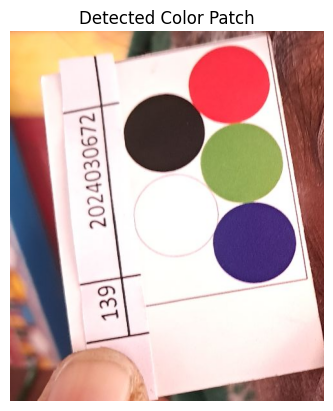

Detected Colors (RGB): {'Color 1': (188.90943268416598, 177.6243183742591, 186.47881456392886), 'Color 2': (239.38458933107538, 234.79122777307367, 234.88738357324303), 'Color 3': (198.1587468247248, 195.72203217612193, 196.77801862828113), 'Color 4': (141.63414055884843, 126.27762912785775, 136.82482641828958), 'Color 5': (156.14769860211388, 117.44275485850665, 129.32594613024207)}
Normalization Factors: {'black': [0.0, 0.0, 0.0], 'white': [1.3498531882541278, 1.0860712404743595, 1.2958764488918944], 'red': [1.3498531882541278, 0.0, 0.0], 'green': [0.0, 1.0860712404743595, 0.0], 'blue': [0.0, 0.0, 1.2958764488918944]}


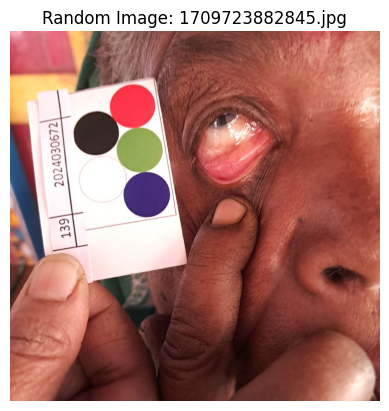

In [ ]:
import numpy as np
image_dir = os.path.join(dataset_path, 'Right_eye_files')

# List all files in the directory
all_files = os.listdir(image_dir)

# Filter only image files
image_files = [f for f in all_files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Check if there are images in the folder
if not image_files:
    raise FileNotFoundError(f"No image files found in directory: {image_dir}")

# Randomly select an image
example_image_name = random.choice(image_files)

# Full path to the randomly selected image
image_path = os.path.join(image_dir, example_image_name)

# Read the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to read the image: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Detect the color patch
# Convert to grayscale for easier detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use thresholding to isolate the white color reference patch
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Find contours of the white regions
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assume the largest white area corresponds to the patch
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Check if any contour is found
if contours:
    patch_contour = contours[0]
    x, y, w, h = cv2.boundingRect(patch_contour)

    # Crop the patch region
    color_patch = image_rgb[y:y + h, x:x + w]

    # Display the detected patch
    plt.imshow(color_patch)
    plt.axis('off')
    plt.title("Detected Color Patch")
    plt.show()

    # Step 2: Extract the RGB values of each patch
    # Define approximate positions for the color circles (manual tweak for uniform patches)
    patch_height, patch_width = color_patch.shape[:2]
    circle_radius = patch_width // 5  # Estimate circle radius
    detected_colors = {}

    # Define the approximate circle positions (red, green, blue, white, black)
    circle_centers = [
        (int(patch_width * 0.2), int(patch_height * 0.5)),  # Black
        (int(patch_width * 0.4), int(patch_height * 0.5)),  # White
        (int(patch_width * 0.6), int(patch_height * 0.5)),  # Red
        (int(patch_width * 0.8), int(patch_height * 0.5)),  # Green
        (int(patch_width * 1.0), int(patch_height * 0.5)),  # Blue
    ]

    for i, center in enumerate(circle_centers):
        mask = np.zeros((patch_height, patch_width), dtype=np.uint8)
        cv2.circle(mask, center, circle_radius, 255, -1)  # Create mask for each circle
        mean_color = cv2.mean(color_patch, mask=mask)[:3]  # Extract mean color
        detected_colors[f"Color {i + 1}"] = mean_color

    print("Detected Colors (RGB):", detected_colors)

    # Step 3: Normalize the image colors
    # Assume known target RGB values for black, white, red, green, blue
    known_colors = {
        "black": [0, 0, 0],
        "white": [255, 255, 255],
        "red": [255, 0, 0],
        "green": [0, 255, 0],
        "blue": [0, 0, 255]
    }

    # Compute normalization factors
    normalization_matrix = {
        color_name: [
            known_colors[color_name][i] / detected_colors[f"Color {i + 1}"][i]
            for i in range(3)
        ]
        for color_name in known_colors.keys()
    }

    print("Normalization Factors:", normalization_matrix)
else:
    print("No color reference patch detected.")

# Display the original image
plt.imshow(image_rgb)
plt.axis('off')
plt.title(f"Random Image: {example_image_name}")
plt.show()

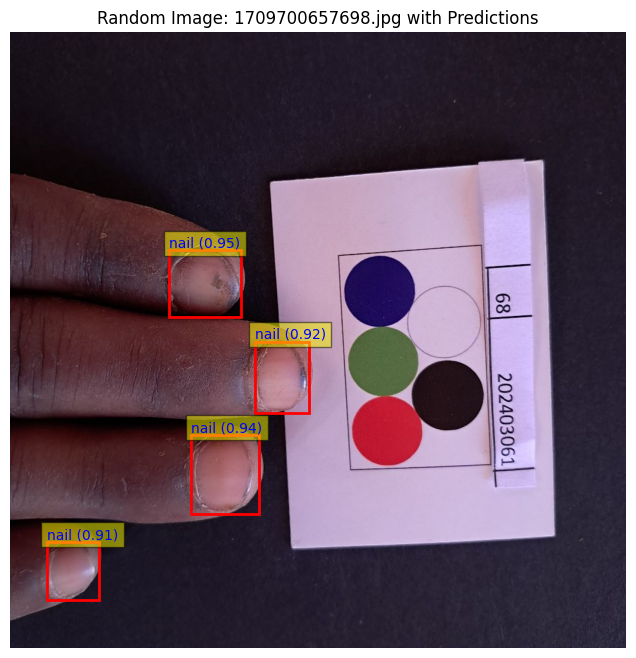

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from inference_sdk import InferenceHTTPClient

# Initialize the Roboflow API client
CLIENT = InferenceHTTPClient(
    api_url="https://outline.roboflow.com",
    api_key="nna7o9IXroJVj8xdVQeg"
)

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/ANEMIA"
image_dir = os.path.join(dataset_path, 'Right_Fingernail_files/Images_right_fingernail')

# List all files in the directory
all_files = os.listdir(image_dir)
image_files = [f for f in all_files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Check if there are images in the folder
if not image_files:
    raise FileNotFoundError(f"No image files found in directory: {image_dir}")

# Randomly select an image
example_image_name = random.choice(image_files)
image_path = os.path.join(image_dir, example_image_name)

# Use the Roboflow client to infer
result = CLIENT.infer(image_path, model_id="nail-segmentation-odcgv/2")

# Parse predictions and apply confidence threshold
predictions = [pred for pred in result.get("predictions", []) if pred["confidence"] >= 0.75]

# Load the image using OpenCV for consistency
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to read the image: {image_path}")

# Convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_rgb)

# Draw predictions with bounding boxes and labels
for prediction in predictions:
    # Extract bounding box details
    x_center = prediction["x"]
    y_center = prediction["y"]
    width = prediction["width"]
    height = prediction["height"]

    # Calculate the top-left corner of the bounding box
    x = x_center - width / 2
    y = y_center - height / 2

    # Add the bounding box to the plot
    ax.add_patch(Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))

    # Add the class label and confidence
    ax.text(x, y - 5, f"{prediction['class']} ({prediction['confidence']:.2f})",
            color='blue', fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))

# Add the title and display the image
plt.axis('off')
plt.title(f"Random Image: {example_image_name} with Predictions")
plt.show()